In [1]:
import os

import pandas as pd
import cv2

import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch

In [2]:
np.random.seed(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ]))

mnist_dataloader = DataLoader(mnist_trainset, shuffle=True, batch_size=128)
dataloader_size = len(mnist_dataloader)
dataloader_size

469

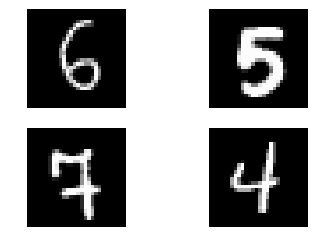

In [4]:
images, _ = next(iter(mnist_dataloader))

for i, image in enumerate(images[:4]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image[0, :, :], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
class Generator(nn.Module):
    def __init__(self, input_size, image_size=128, n_channels=3):
        super(Generator, self).__init__()
        
        self.input_size = input_size
        self.n_channels = n_channels
        self.output_size = image_size

        self.fc1 = nn.Sequential(
                    nn.Linear(self.input_size, 256),
                    nn.ReLU())   
        
        self.fc2 = nn.Sequential(
                    nn.Linear(256, 512),
                    nn.ReLU())
        
        self.fc3 = nn.Sequential(
                    nn.Linear(512, 1024),
                    nn.ReLU())
        
        self.fc4 = nn.Sequential(
                    nn.Linear(1024, self.output_size * self.output_size * self.n_channels),
                    nn.Tanh())
        
    def forward(self, z):
        hidden = self.fc1(z)
        hidden = self.fc2(hidden)
        hidden = self.fc3(hidden)
        hidden = self.fc4(hidden)
        
        hidden = hidden.view(-1, self.n_channels, self.output_size, self.output_size)
        return hidden

In [6]:
class Discriminator(nn.Module):
    def __init__(self, image_size, n_channels=3):
        super(Discriminator, self).__init__()
        
        self.image_size = image_size
        self.fc1 = nn.Sequential(
                    nn.Linear(self.image_size * self.image_size, 256),
                    nn.LeakyReLU(0.2))
        
        self.fc2 = nn.Sequential(
                    nn.Linear(256, 512),
                    nn.LeakyReLU(0.2))
        
        self.fc3 = nn.Sequential(
                    nn.Linear(512, 1024),
                    nn.LeakyReLU(0.2))
        
        self.fc4 = nn.Sequential(nn.Linear(1024, 1))
        
    def forward(self, x):
        x = x.view(-1, self.image_size * self.image_size)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)

        return x

In [7]:
n_epochs = 100
generator_lr = 2e-4
discriminator_lr = 2e-4
d_iters = 1
g_iters = 1

generator = Generator(64, 28, n_channels=1).to(device)
discriminator = Discriminator(28, n_channels=1).to(device)

optimizer_g = torch.optim.Adam(generator.parameters(), lr=generator_lr)
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=discriminator_lr)

adversarial_loss = torch.nn.BCEWithLogitsLoss()

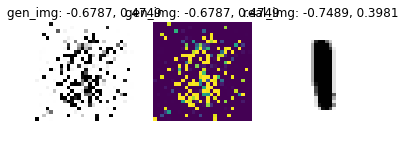

[Epoch 0/100] [D loss: 0.021195] [G loss: 4.885230]


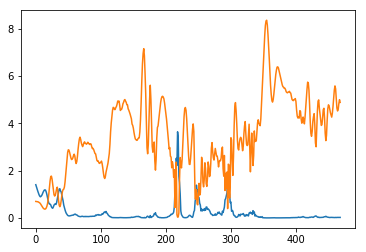

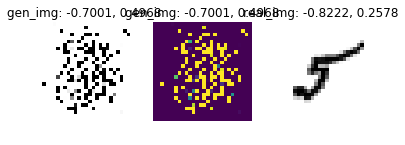

[Epoch 1/100] [D loss: 0.031363] [G loss: 6.028574]


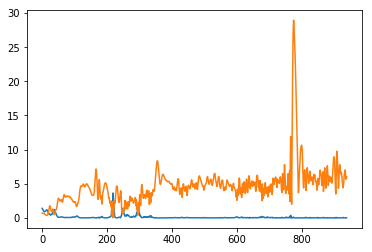

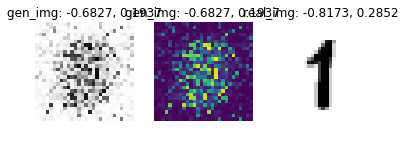

[Epoch 2/100] [D loss: 0.289421] [G loss: 4.109884]


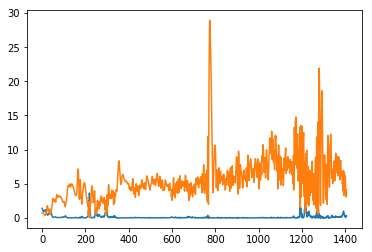

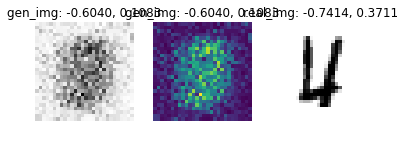

[Epoch 3/100] [D loss: 1.016395] [G loss: 2.379407]


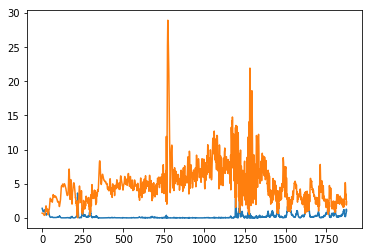

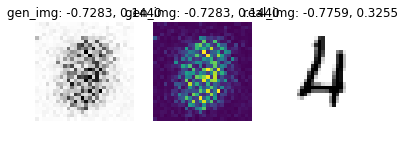

[Epoch 4/100] [D loss: 0.141129] [G loss: 3.117159]


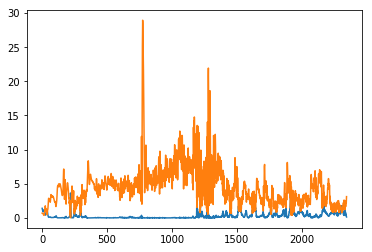

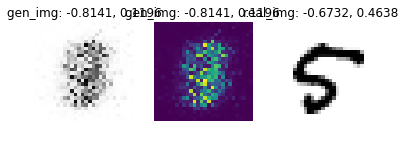

[Epoch 5/100] [D loss: 2.181859] [G loss: 2.079567]


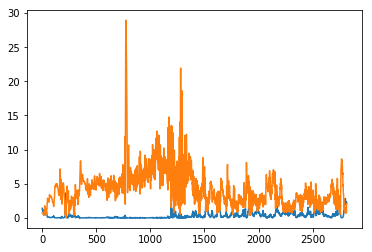

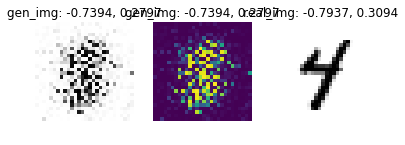

[Epoch 6/100] [D loss: 0.094806] [G loss: 3.805933]


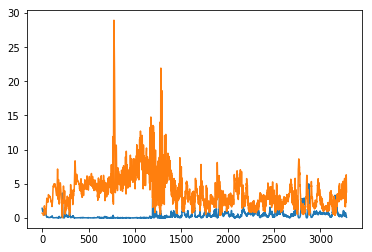

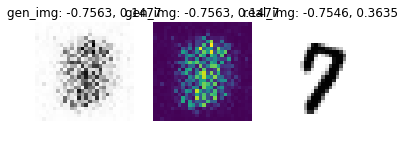

[Epoch 7/100] [D loss: 0.159325] [G loss: 3.575461]


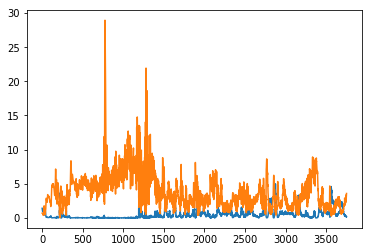

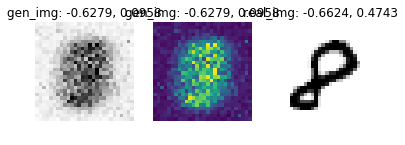

[Epoch 8/100] [D loss: 2.099658] [G loss: 1.431081]


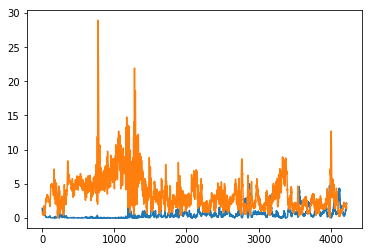

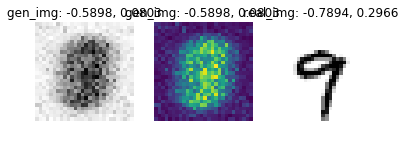

[Epoch 9/100] [D loss: 0.348568] [G loss: 2.887369]


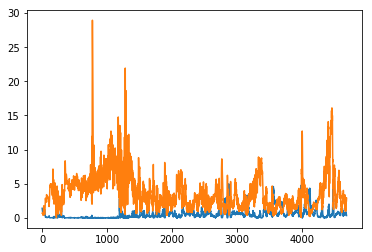

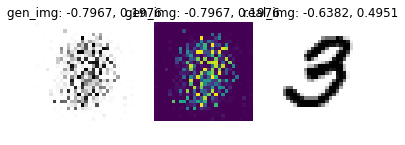

[Epoch 10/100] [D loss: 2.532127] [G loss: 4.280789]


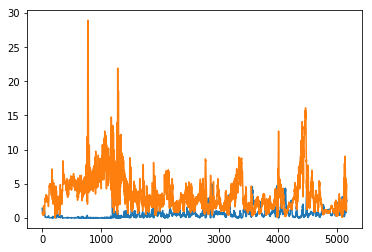

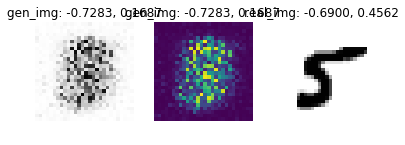

[Epoch 11/100] [D loss: 0.220921] [G loss: 4.581243]


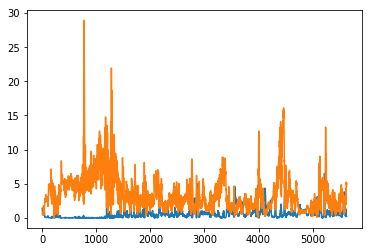

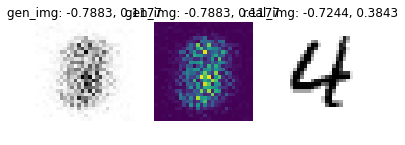

[Epoch 12/100] [D loss: 0.534090] [G loss: 3.138883]


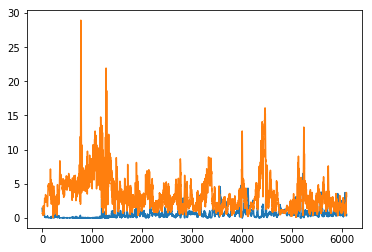

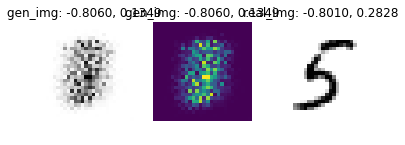

[Epoch 13/100] [D loss: 0.898277] [G loss: 2.420514]


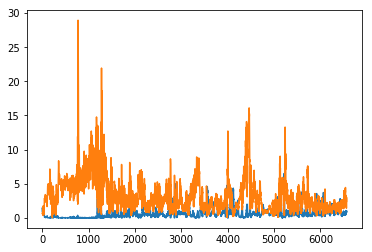

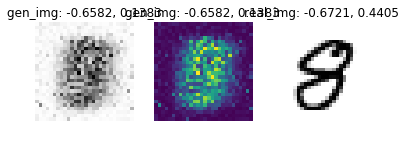

[Epoch 14/100] [D loss: 0.301886] [G loss: 2.890665]


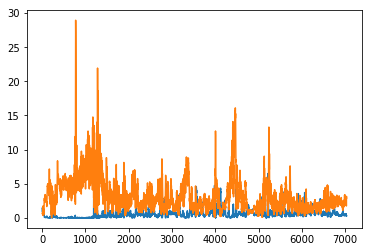

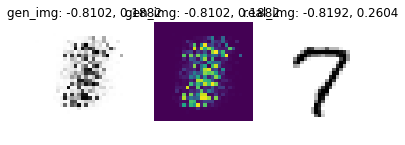

[Epoch 15/100] [D loss: 0.386971] [G loss: 3.038879]


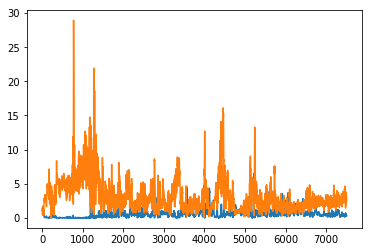

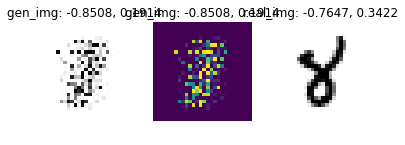

[Epoch 16/100] [D loss: 0.228475] [G loss: 2.804117]


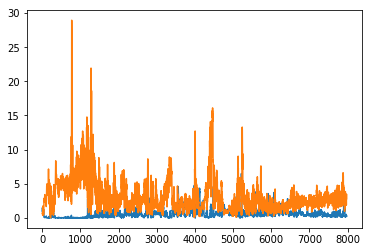

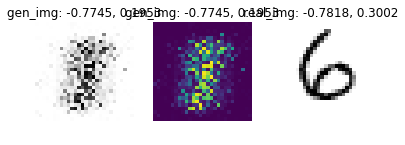

[Epoch 17/100] [D loss: 0.810977] [G loss: 1.262339]


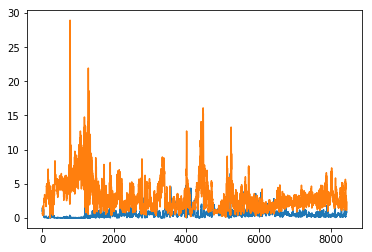

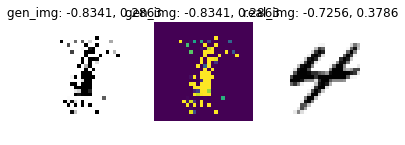

[Epoch 18/100] [D loss: 0.600164] [G loss: 2.287160]


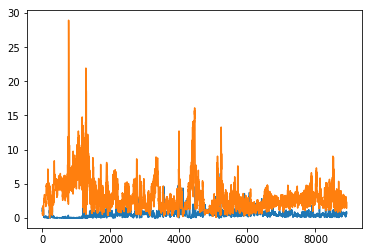

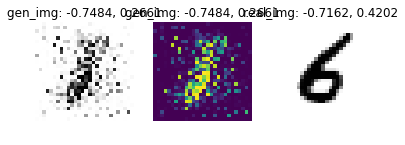

[Epoch 19/100] [D loss: 0.139428] [G loss: 5.349906]


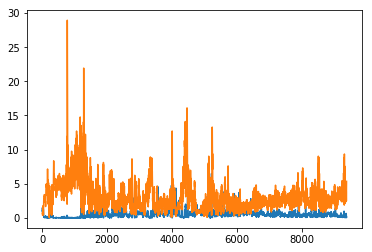

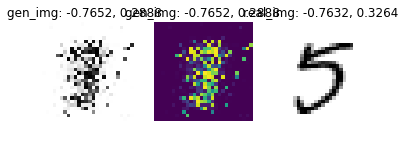

[Epoch 20/100] [D loss: 0.098184] [G loss: 5.313270]


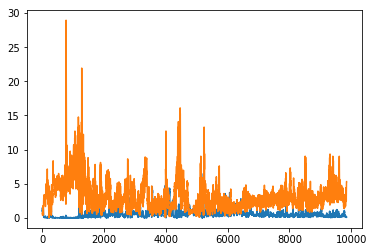

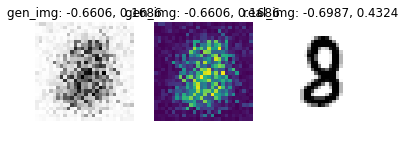

[Epoch 21/100] [D loss: 0.130573] [G loss: 5.183072]


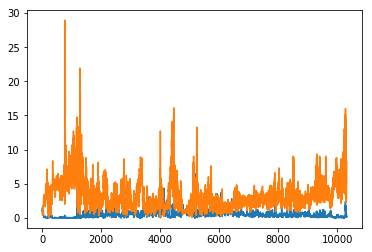

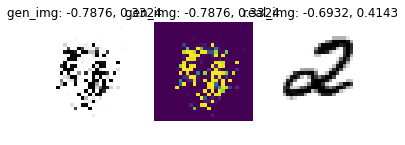

[Epoch 22/100] [D loss: 0.041558] [G loss: 5.175138]


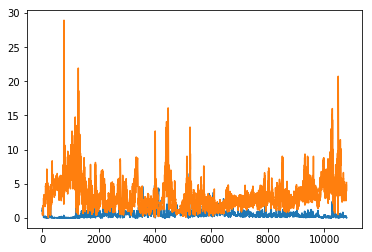

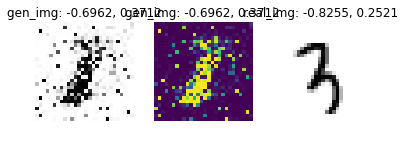

[Epoch 23/100] [D loss: 0.125095] [G loss: 4.866790]


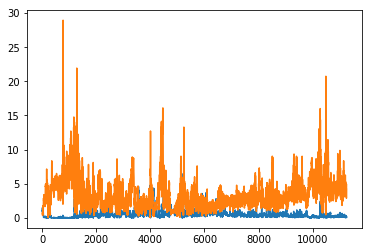

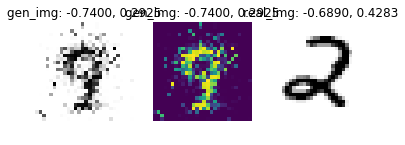

[Epoch 24/100] [D loss: 0.150601] [G loss: 4.986115]


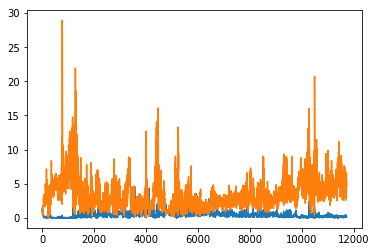

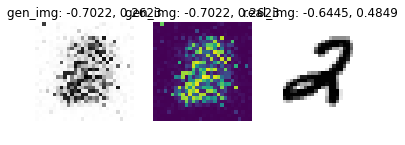

[Epoch 25/100] [D loss: 0.049528] [G loss: 4.708920]


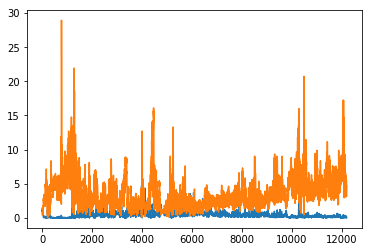

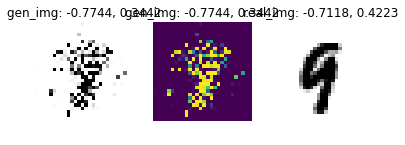

[Epoch 26/100] [D loss: 0.209824] [G loss: 6.605258]


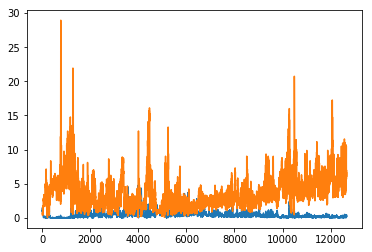

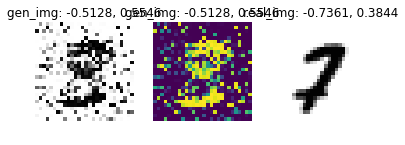

[Epoch 27/100] [D loss: 0.114080] [G loss: 5.901989]


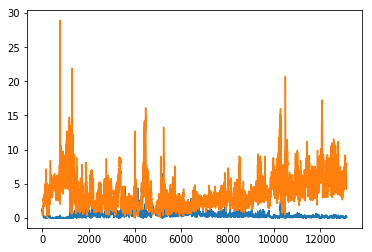

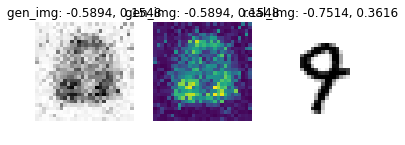

[Epoch 28/100] [D loss: 0.109541] [G loss: 4.185547]


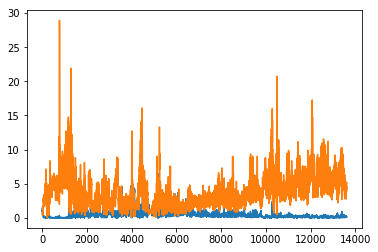

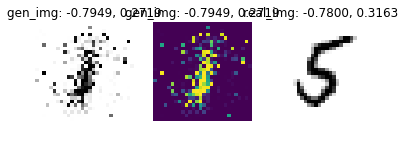

[Epoch 29/100] [D loss: 0.357924] [G loss: 4.302712]


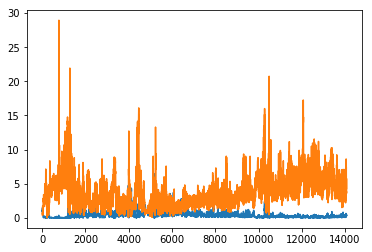

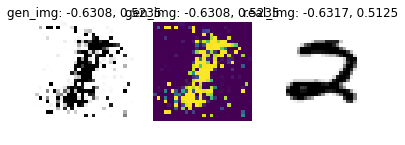

[Epoch 30/100] [D loss: 0.317595] [G loss: 4.513922]


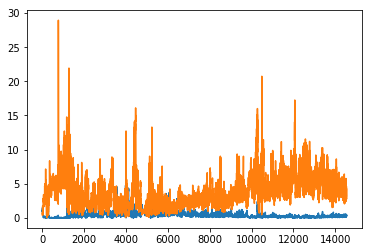

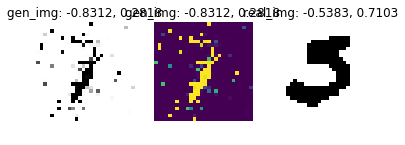

[Epoch 31/100] [D loss: 0.336768] [G loss: 5.141815]


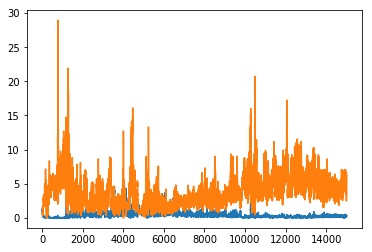

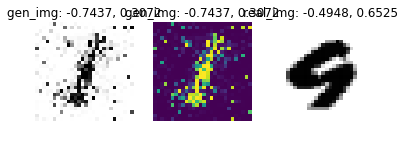

[Epoch 32/100] [D loss: 0.239938] [G loss: 8.519953]


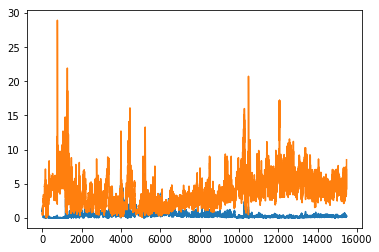

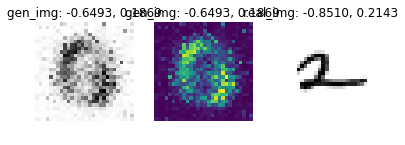

[Epoch 33/100] [D loss: 0.194214] [G loss: 4.260629]


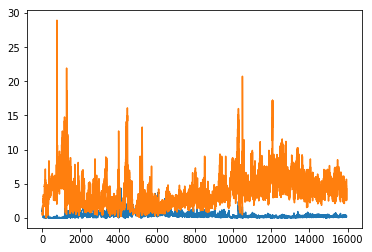

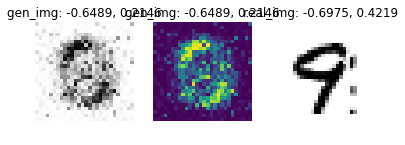

[Epoch 34/100] [D loss: 0.359077] [G loss: 3.303168]


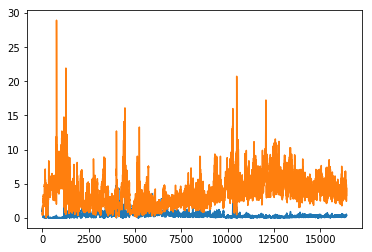

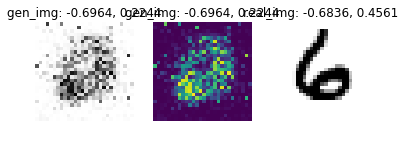

[Epoch 35/100] [D loss: 0.126383] [G loss: 5.063473]


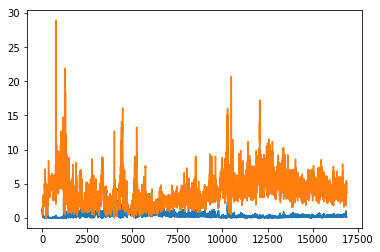

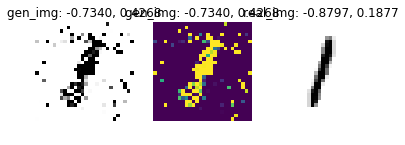

[Epoch 36/100] [D loss: 0.178392] [G loss: 6.982410]


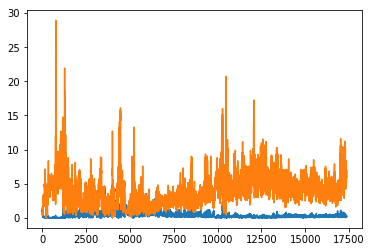

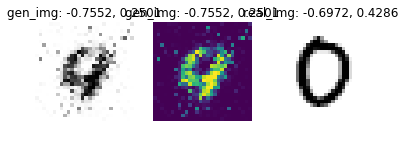

[Epoch 37/100] [D loss: 0.151917] [G loss: 4.029552]


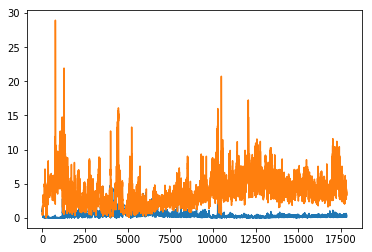

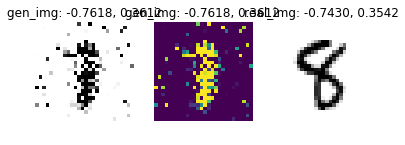

[Epoch 38/100] [D loss: 0.225254] [G loss: 4.370625]


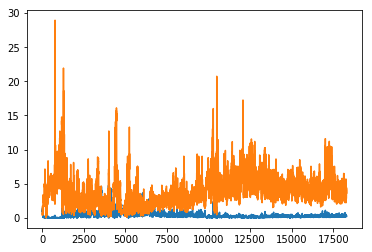

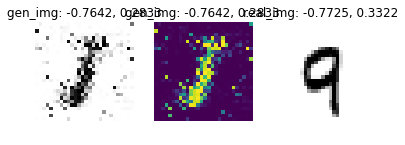

[Epoch 39/100] [D loss: 0.105496] [G loss: 4.995293]


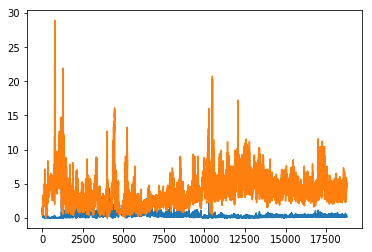

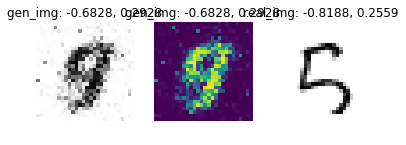

[Epoch 40/100] [D loss: 0.364319] [G loss: 4.675953]


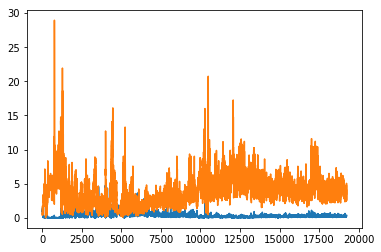

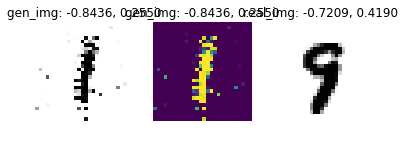

[Epoch 41/100] [D loss: 0.148522] [G loss: 4.386250]


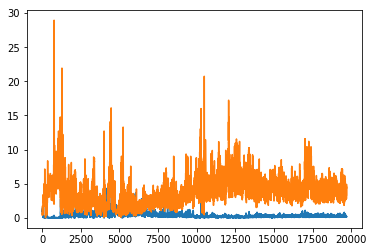

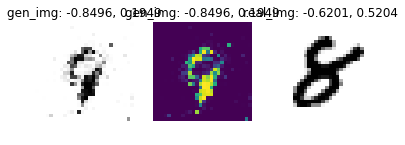

[Epoch 42/100] [D loss: 0.253978] [G loss: 3.564695]


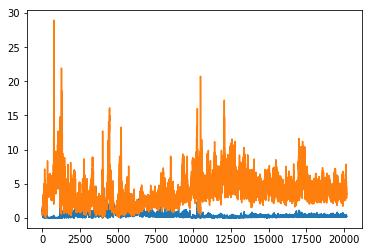

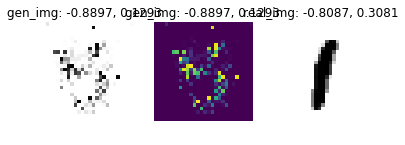

[Epoch 43/100] [D loss: 0.439961] [G loss: 3.392543]


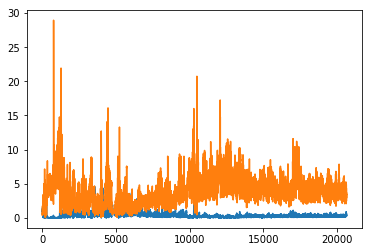

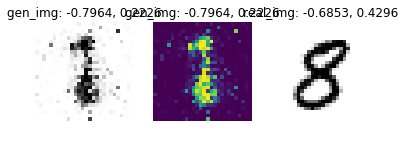

[Epoch 44/100] [D loss: 0.167185] [G loss: 4.937434]


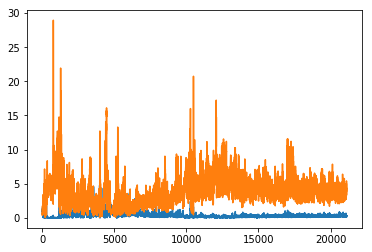

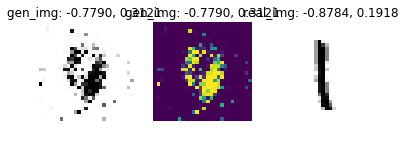

[Epoch 45/100] [D loss: 0.352666] [G loss: 4.009347]


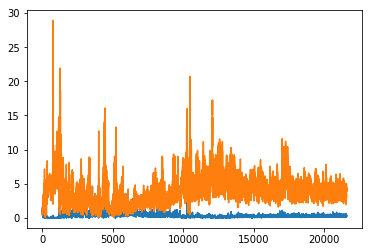

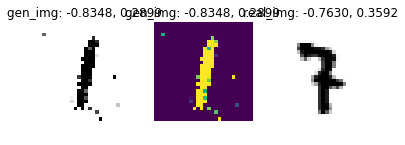

[Epoch 46/100] [D loss: 0.281028] [G loss: 3.645847]


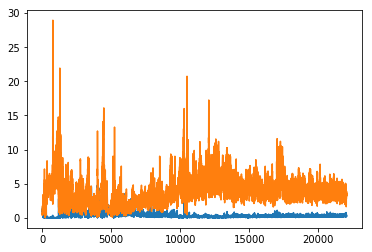

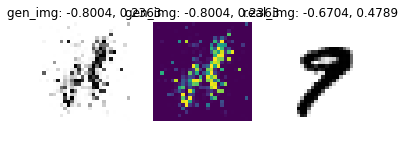

[Epoch 47/100] [D loss: 0.314040] [G loss: 2.620566]


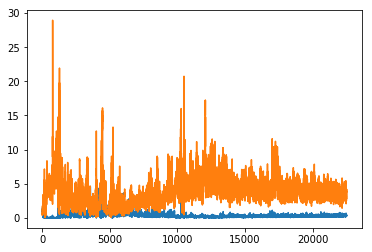

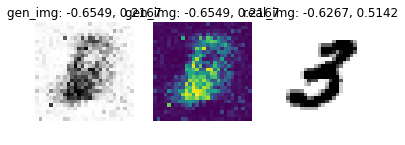

[Epoch 48/100] [D loss: 0.214921] [G loss: 3.590123]


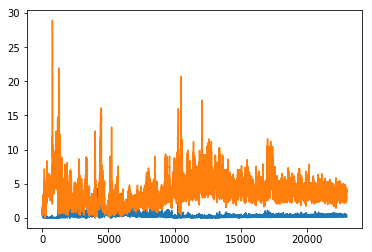

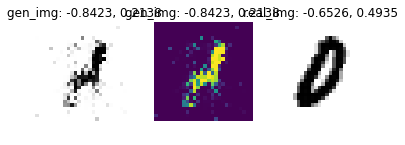

[Epoch 49/100] [D loss: 0.382897] [G loss: 2.633965]


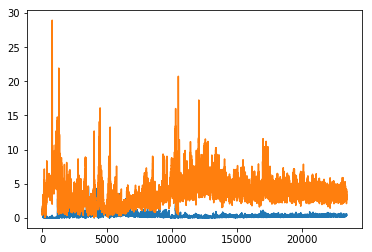

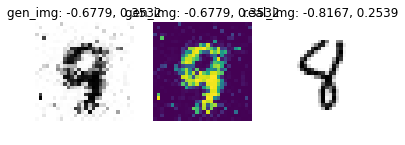

[Epoch 50/100] [D loss: 0.646741] [G loss: 2.496480]


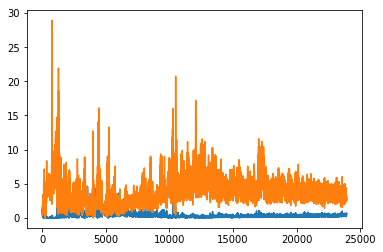

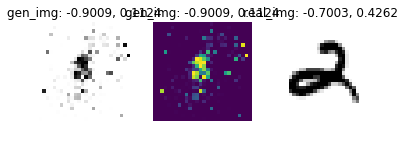

[Epoch 51/100] [D loss: 0.175946] [G loss: 3.750415]


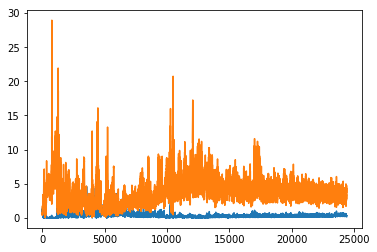

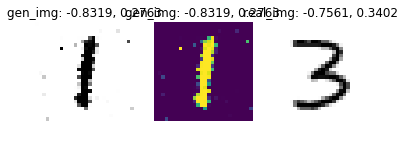

[Epoch 52/100] [D loss: 0.364397] [G loss: 3.476384]


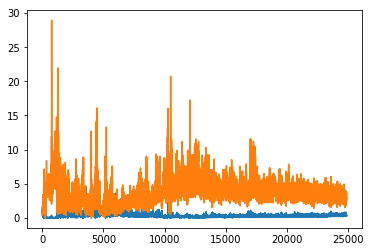

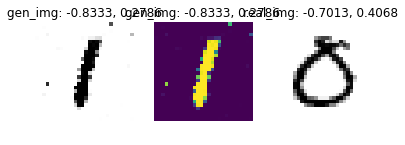

[Epoch 53/100] [D loss: 0.612702] [G loss: 2.025247]


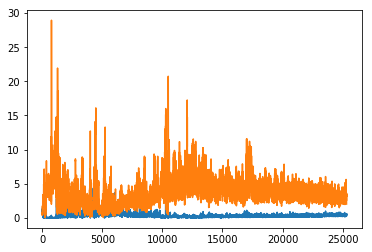

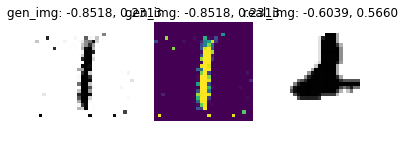

[Epoch 54/100] [D loss: 0.464140] [G loss: 3.742054]


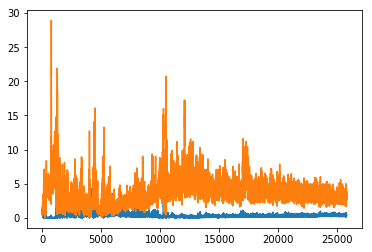

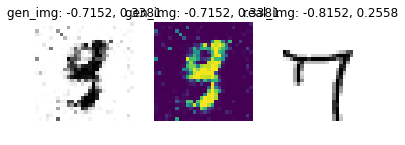

[Epoch 55/100] [D loss: 0.180354] [G loss: 3.129137]


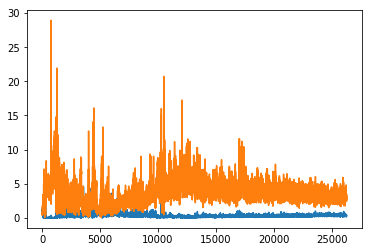

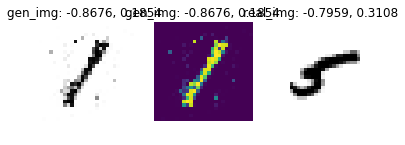

[Epoch 56/100] [D loss: 0.402769] [G loss: 2.772996]


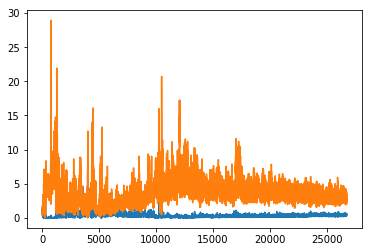

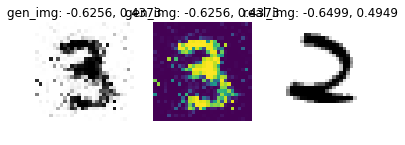

[Epoch 57/100] [D loss: 0.775594] [G loss: 1.744901]


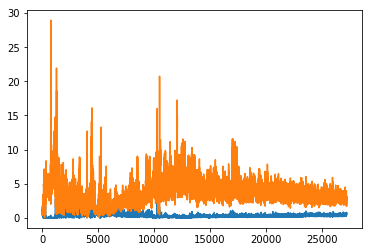

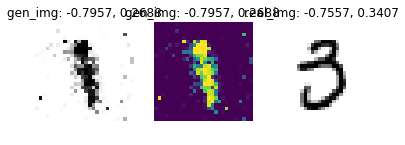

[Epoch 58/100] [D loss: 0.369101] [G loss: 3.930415]


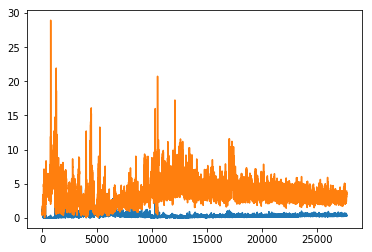

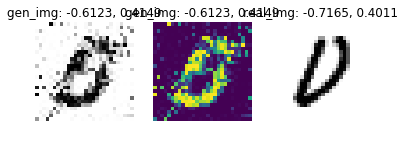

[Epoch 59/100] [D loss: 0.362176] [G loss: 3.320570]


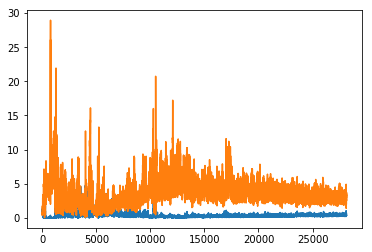

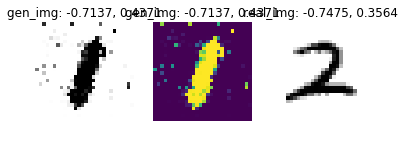

[Epoch 60/100] [D loss: 0.371720] [G loss: 2.877707]


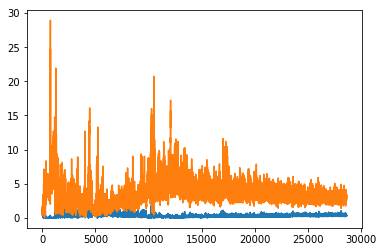

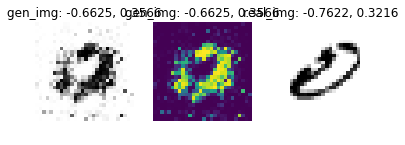

[Epoch 61/100] [D loss: 0.382741] [G loss: 2.761687]


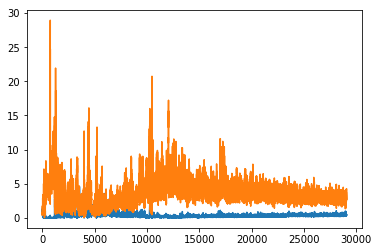

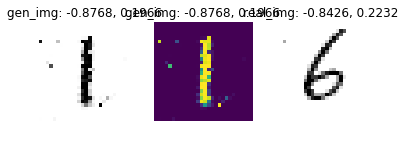

[Epoch 62/100] [D loss: 0.312666] [G loss: 2.650497]


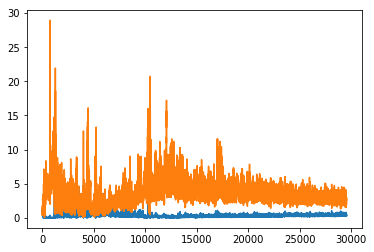

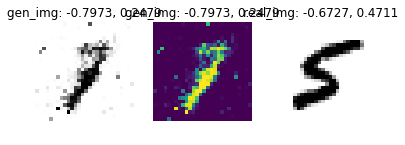

[Epoch 63/100] [D loss: 0.404391] [G loss: 2.762364]


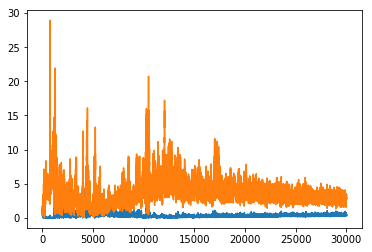

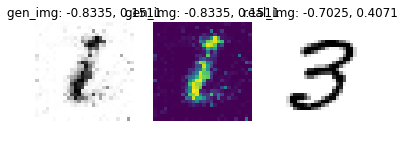

[Epoch 64/100] [D loss: 0.365555] [G loss: 2.654495]


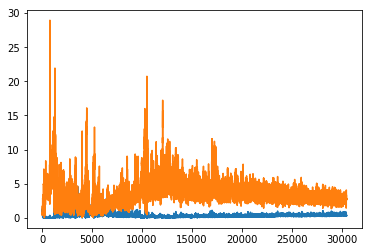

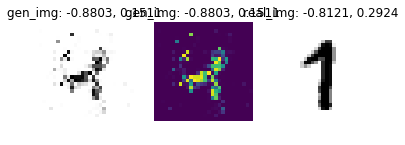

[Epoch 65/100] [D loss: 0.376356] [G loss: 3.111986]


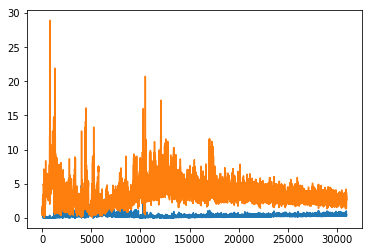

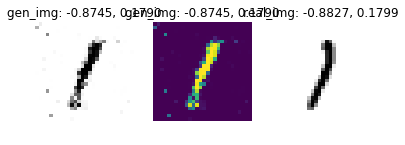

[Epoch 66/100] [D loss: 0.496773] [G loss: 2.139754]


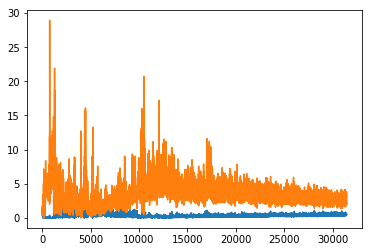

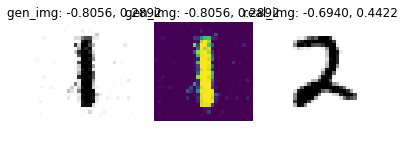

[Epoch 67/100] [D loss: 0.439136] [G loss: 3.071046]


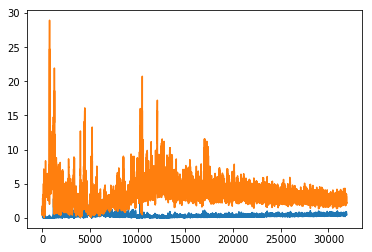

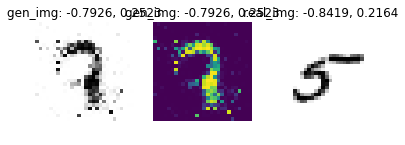

[Epoch 68/100] [D loss: 0.565263] [G loss: 2.184330]


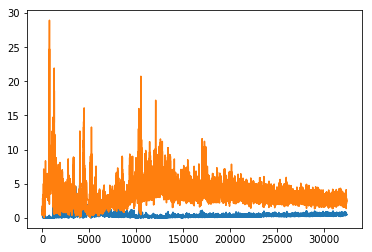

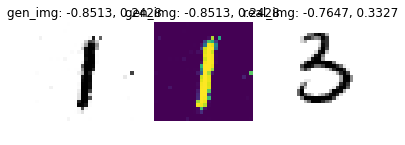

[Epoch 69/100] [D loss: 0.608740] [G loss: 2.394236]


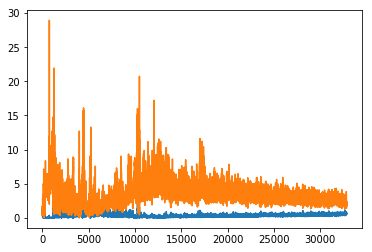

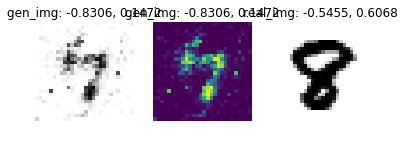

[Epoch 70/100] [D loss: 0.835798] [G loss: 1.877988]


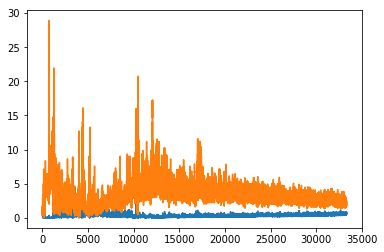

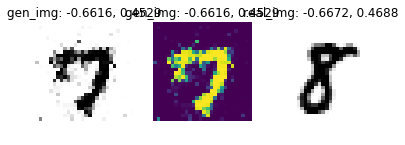

[Epoch 71/100] [D loss: 0.461400] [G loss: 2.703116]


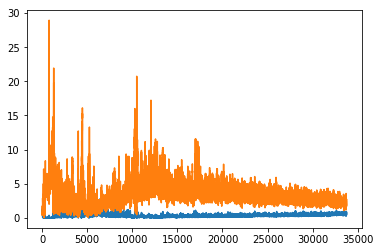

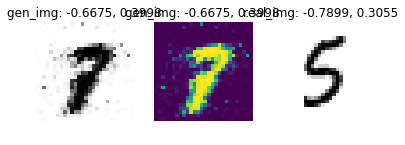

[Epoch 72/100] [D loss: 0.617151] [G loss: 1.884875]


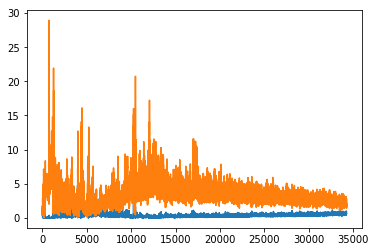

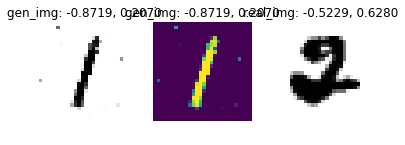

[Epoch 73/100] [D loss: 0.673517] [G loss: 1.909304]


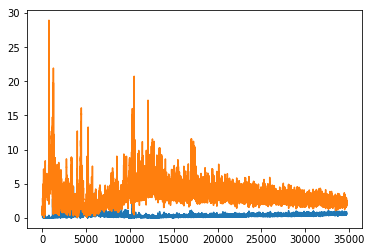

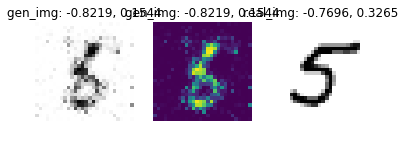

[Epoch 74/100] [D loss: 0.558646] [G loss: 2.189111]


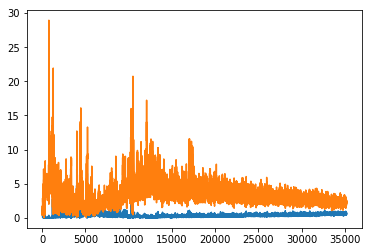

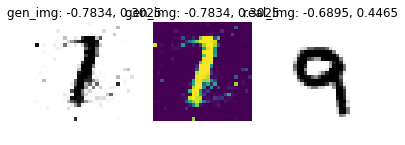

[Epoch 75/100] [D loss: 0.676829] [G loss: 2.136407]


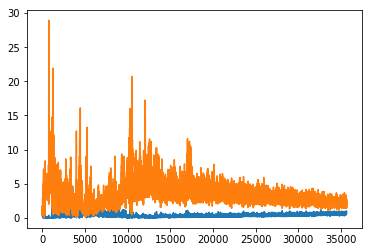

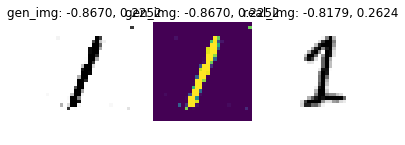

[Epoch 76/100] [D loss: 0.675654] [G loss: 2.770335]


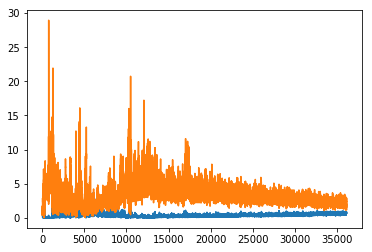

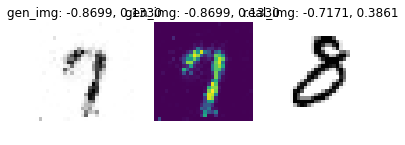

[Epoch 77/100] [D loss: 0.801753] [G loss: 2.001541]


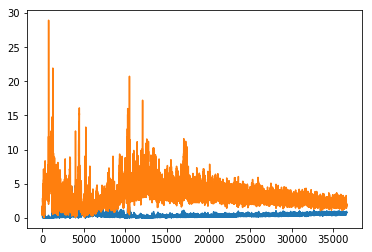

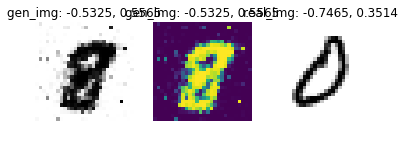

[Epoch 78/100] [D loss: 0.577373] [G loss: 2.387990]


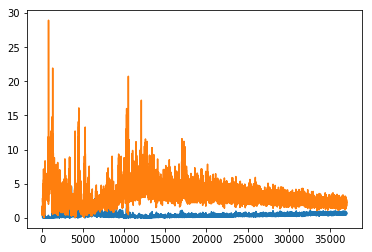

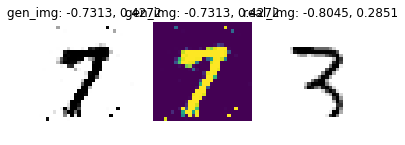

[Epoch 79/100] [D loss: 0.726335] [G loss: 1.929030]


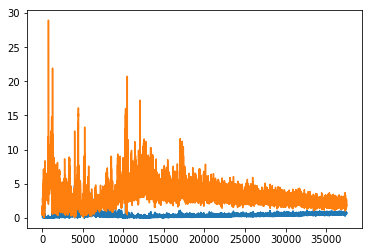

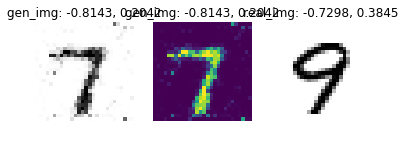

[Epoch 80/100] [D loss: 0.439111] [G loss: 2.378878]


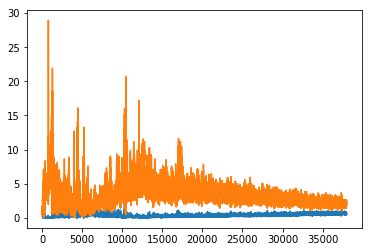

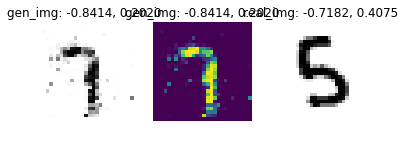

[Epoch 81/100] [D loss: 0.536483] [G loss: 2.509712]


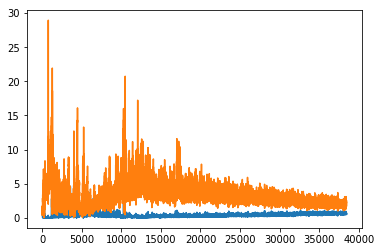

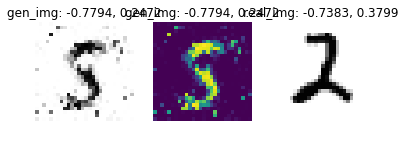

[Epoch 82/100] [D loss: 0.437486] [G loss: 2.726948]


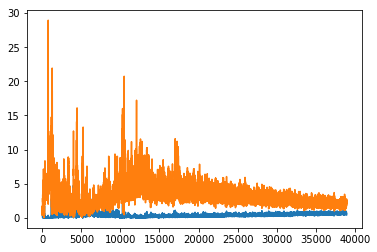

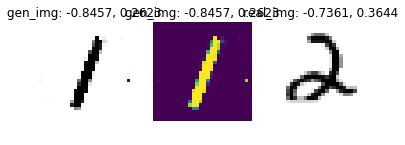

[Epoch 83/100] [D loss: 0.876372] [G loss: 2.153818]


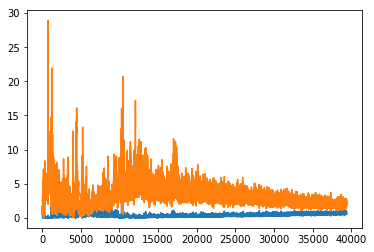

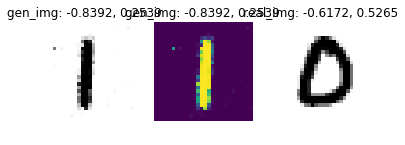

[Epoch 84/100] [D loss: 0.706269] [G loss: 2.193527]


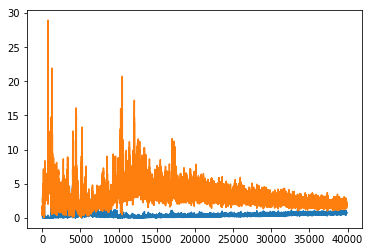

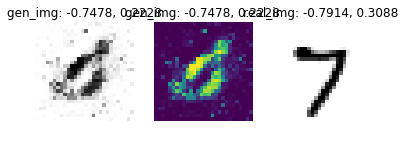

[Epoch 85/100] [D loss: 0.948981] [G loss: 1.577060]


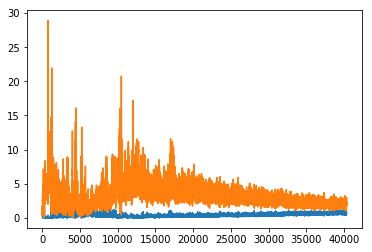

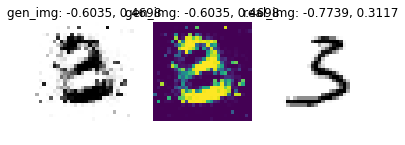

[Epoch 86/100] [D loss: 0.857867] [G loss: 1.815888]


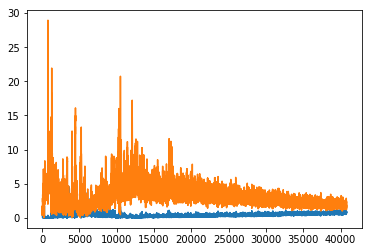

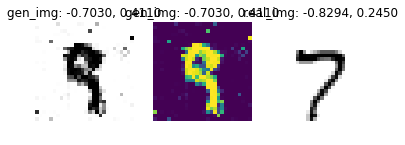

[Epoch 87/100] [D loss: 0.667688] [G loss: 1.628718]


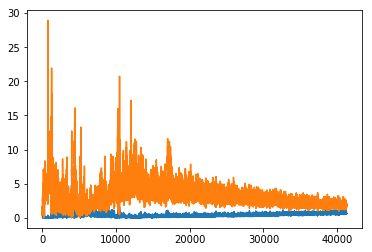

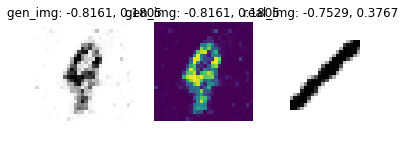

[Epoch 88/100] [D loss: 0.733950] [G loss: 2.106336]


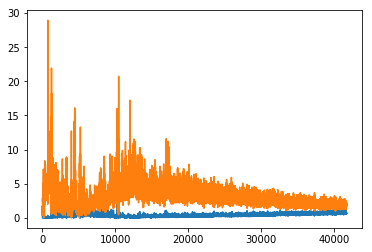

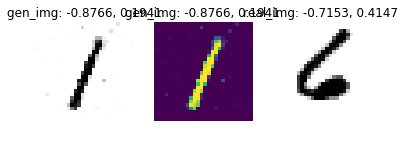

[Epoch 89/100] [D loss: 0.845055] [G loss: 2.000391]


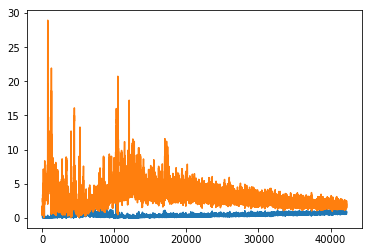

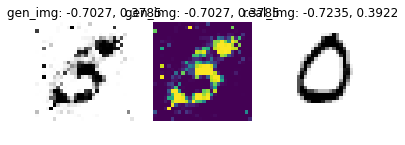

[Epoch 90/100] [D loss: 0.555108] [G loss: 2.141508]


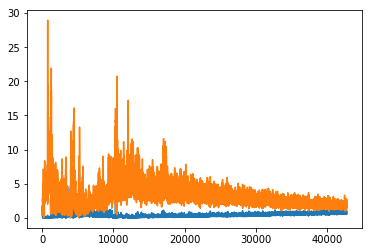

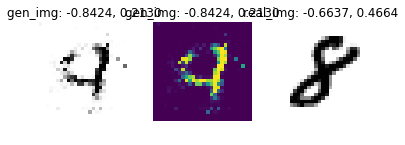

[Epoch 91/100] [D loss: 0.808108] [G loss: 1.199345]


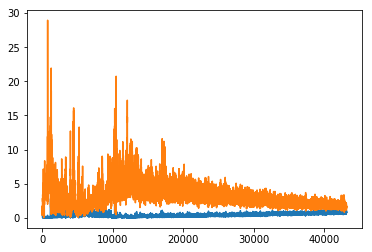

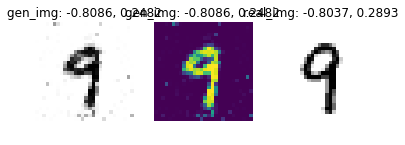

[Epoch 92/100] [D loss: 0.609430] [G loss: 1.832113]


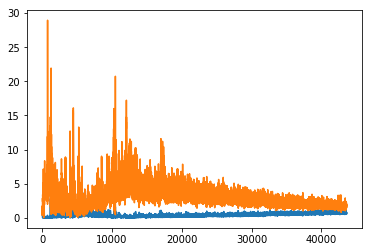

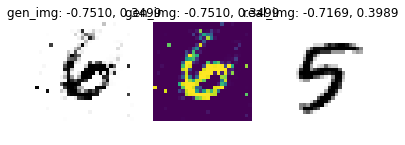

[Epoch 93/100] [D loss: 0.763663] [G loss: 1.822032]


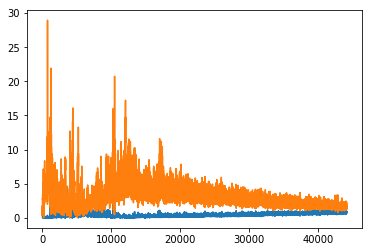

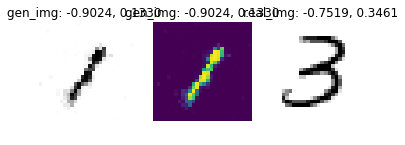

[Epoch 94/100] [D loss: 0.845586] [G loss: 2.134699]


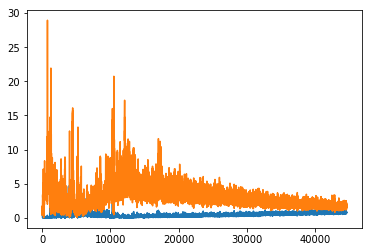

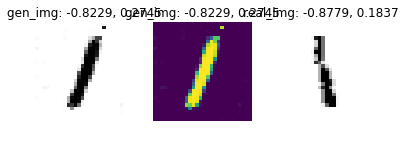

[Epoch 95/100] [D loss: 0.982587] [G loss: 1.272313]


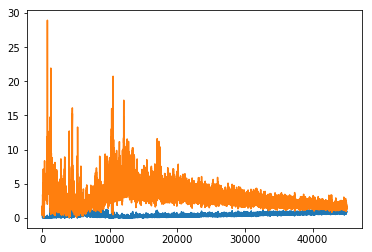

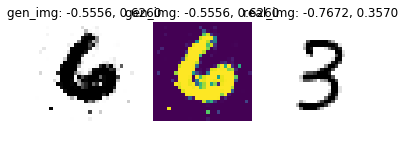

[Epoch 96/100] [D loss: 1.078921] [G loss: 1.639615]


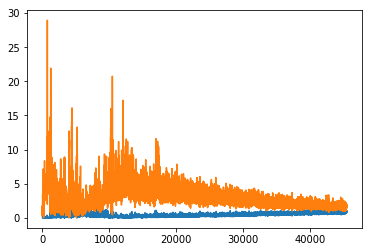

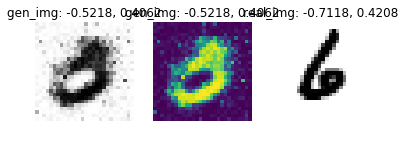

[Epoch 97/100] [D loss: 0.798667] [G loss: 1.774338]


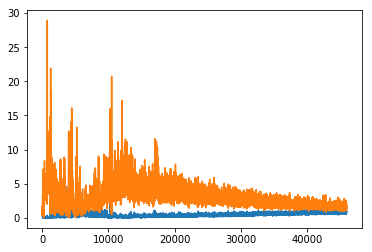

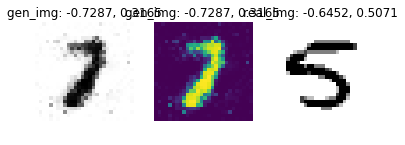

[Epoch 98/100] [D loss: 0.871919] [G loss: 1.550301]


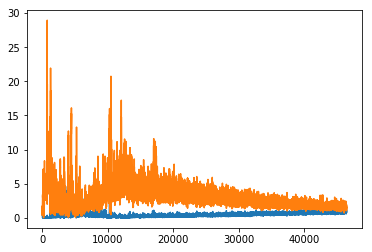

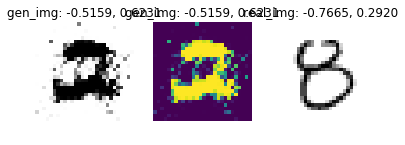

[Epoch 99/100] [D loss: 0.850142] [G loss: 1.968200]


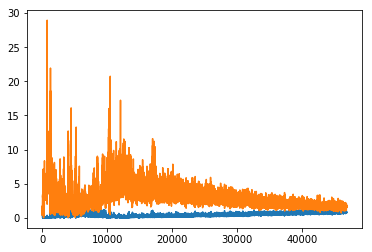

In [8]:
results = pd.DataFrame()
results['d_history'] = []
results['g_history'] = []

for epoch in range(n_epochs):

    for i, (images, _) in enumerate(mnist_dataloader):
        images = images.to(device)
        real = Variable(torch.tensor([[1.]] * images.shape[0], device=device), requires_grad=False)
        fake = Variable(torch.tensor([[0.]] * images.shape[0], device=device), requires_grad=False)
        
        # Train the generator
        for _ in range(g_iters):
            optimizer_g.zero_grad()

            z = Variable(torch.cuda.FloatTensor(np.random.randn(images.shape[0], 64), device=device))

            generated_images = generator(z)
            gen_logits = discriminator(generated_images)
            g_loss = adversarial_loss(gen_logits, real)

            g_loss.backward()
            optimizer_g.step()
        
        # Train the discriminator
        for _ in range(d_iters):
            optimizer_d.zero_grad()
            real_logits = discriminator(images)
            fake_logits = discriminator(generated_images.detach())

            d_loss = adversarial_loss(real_logits, real) + adversarial_loss(fake_logits, fake)
            d_loss.backward()
            optimizer_d.step()

        results = results.append([{'d_history': d_loss.cpu().data.numpy(), 
                                 'g_history': g_loss.cpu().data.numpy()}])
    
    real_img = images[0, 0].data.cpu().numpy()
    gen_img = generated_images[0, 0].data.cpu().numpy()

    
    plt.subplot(1, 3, 1)
    plt.title('gen_img: {:.4f}, {:.4f}'.format(gen_img.mean(), gen_img.var()))
    plt.imshow(gen_img, cmap='gray_r')

    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('gen_img: {:.4f}, {:.4f}'.format(gen_img.mean(), gen_img.var()))
    plt.imshow(gen_img)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('real_img: {:.4f}, {:.4f}'.format(real_img.mean(), real_img.var()))
    plt.imshow(real_img, cmap='gray_r')

    plt.axis('off')
    plt.show()
    
    print("[Epoch %d/%d] [D loss: %f] [G loss: %f]" % (epoch, n_epochs,
                                                    d_loss, g_loss))

    results['d_history'].astype(np.float32).reset_index(drop=True).plot()
    results['g_history'].astype(np.float32).reset_index(drop=True).plot()
    plt.show()